In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
data = pd.read_csv("exams.csv")
data.head()



,exam_1,exam_2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [2]:
#Normalization of data using sklearn

scaler = MinMaxScaler()
scaler.fit(data)
norm = scaler.transform(data)

clear = pd.DataFrame(norm, columns = ["exam_1", "exam_2", "admitted"])
clear = clear.astype({'admitted': 'int'})
clear.head()

,exam_1,exam_2,admitted
0,0.065428,0.694655,0
1,0.003266,0.194705,0
2,0.082968,0.619618,0
3,0.431764,0.816001,1
4,0.701943,0.655392,1


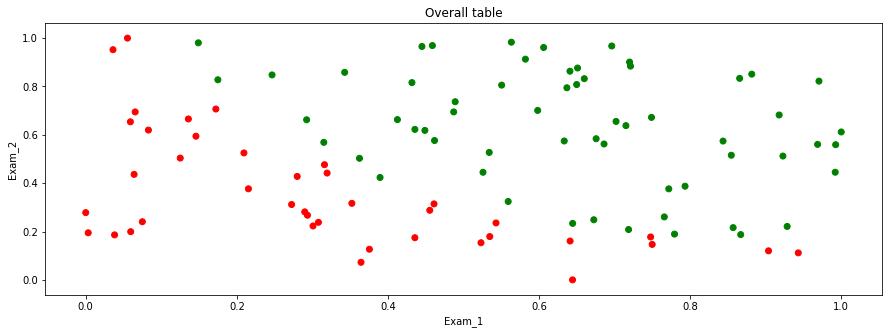

In [3]:
#Visualization of data
plt.figure(figsize = (15, 5))
plt.title("Overall table")
plt.xlabel("Exam_1")
plt.ylabel("Exam_2")
colors = {0 : "red", 1 : "green"}
plt.scatter(clear['exam_1'], clear['exam_2'], c=clear['admitted'].apply(lambda x: colors[x]))
plt.show()

In [4]:
#Sigmoid for gradient
def sigmoid(x):
    return 1 /(1 + np.exp(-x))

In [5]:
#Cost function
def cost(x, y):
    return (-y * np.log(x) - (1 - y) * np.log(1 - x)).mean() 

In [6]:
#learning rate and num of iterations(choosen randomly at the beginning, but after i found that this number of iterations and 
# learning rate is optimal in terms of computer resources and accuracy)
rate = 0.01
iterations = 200000

#setting our data
features = clear[['exam_1','exam_2']].values
y = clear['admitted'].values

features = np.concatenate((np.ones((features.shape[0], 1)), features), axis=1)
t = np.zeros(features.shape[1])
diff = []

for i in range(iterations):
    h_w = sigmoid(np.dot(features, t))
    error = h_w - y
    gradient = np.dot(features.T, (error)) / 100 #size of y
    t -= rate * gradient
    if i % 2000 == 0: print("Current Loss at", i, ": ", cost(h_w, y))
    diff.append(cost(h_w, y))

Current Loss at 0 :  0.6931471805599453
Current Loss at 2000 :  0.5448305466419672
Current Loss at 4000 :  0.47688781019259757
Current Loss at 6000 :  0.4301990908090169
Current Loss at 8000 :  0.39658771701610085
Current Loss at 10000 :  0.3713693648205998
Current Loss at 12000 :  0.35178608834264985
Current Loss at 14000 :  0.33614464686247103
Current Loss at 16000 :  0.32336009278123085
Current Loss at 18000 :  0.3127095159807164
Current Loss at 20000 :  0.3036943334877349
Current Loss at 22000 :  0.29596018997599843
Current Loss at 24000 :  0.2892485686963154
Current Loss at 26000 :  0.2833665237784718
Current Loss at 28000 :  0.2781671441566069
Current Loss at 30000 :  0.2735365848755757
Current Loss at 32000 :  0.2693852389804156
Current Loss at 34000 :  0.2656415912021355
Current Loss at 36000 :  0.2622478513544005
Current Loss at 38000 :  0.2591567950429646
Current Loss at 40000 :  0.2563294398661752
Current Loss at 42000 :  0.2537333103605579
Current Loss at 44000 :  0.2513411

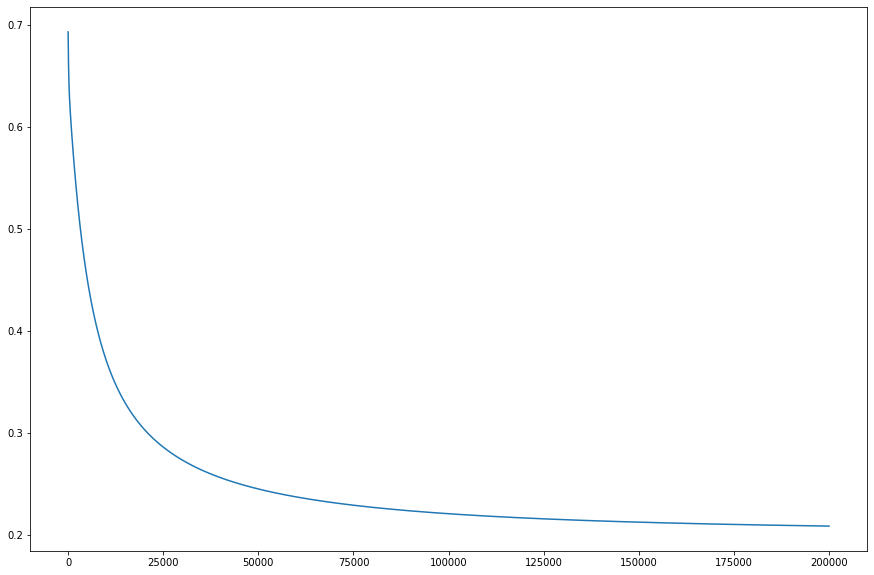

In [7]:
#Visualisation of gradient training
plt.figure(figsize = (15, 10))
plt.plot(range(0, iterations), diff)
plt.show()

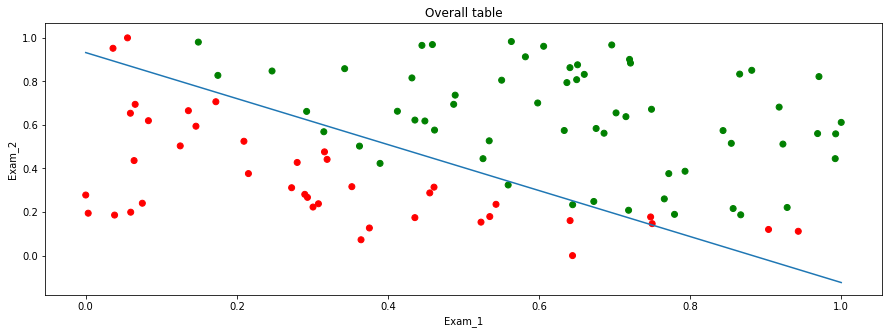

In [8]:
#Visualisation of regression
plt.figure(figsize = (15, 5))
plt.title("Overall table")
plt.xlabel("Exam_1")
plt.ylabel("Exam_2")
colors = {0 : "red", 1 : "green"}
plt.scatter(clear['exam_1'], clear['exam_2'], c=clear['admitted'].apply(lambda x: colors[x]))
x_ax = [np.min(clear['exam_1']), np.max(clear['exam_1'])]
y_ax = - (t[0] + np.dot(t[1], x_ax)) / t[2]
plt.plot(x_ax, y_ax) #decision boundary
plt.show()

In [9]:
#Testing part
def prediction(X, t):
    prob = sigmoid(np.dot(X, t))
    prob[prob > 0.5] = 1
    prob[prob <= 0.5] = 0
    return prob
print(accuracy_score(y, prediction(features, t))) #pretty good accuracy

0.89


In [10]:
#Test models
model1 = np.array([55, 70]) 
model1_ans = 1

model1 = (model1 - data['exam_1'].min())/(data['exam_1'].max()-data['exam_1'].min()) #direct normaliztion
model1 = np.insert(model1, 0, 1.0)
print(model1)

model2 = np.array([40, 60])
model2_ans = 0 

model2 = (model2 - data['exam_1'].min())/(data['exam_1'].max()-data['exam_1'].min()) #direct normaliztion
model2 = np.insert(model2, 0, 1.0)
print(model2)

print("1st model:", sigmoid(np.dot(model1, t))) 
print("2nd model:", sigmoid(np.dot(model2, t))) #everything is right

[1.         0.35748205 0.57247714]
[1.         0.14248696 0.42914708]
1st model: 0.5474388029416335
2nd model: 0.021927372020240095


In [17]:
regression = LogisticRegression(penalty = "l1", C = 5, solver = "liblinear")
regression.fit(data[['exam_1', 'exam_2']], data["admitted"])
answers = np.array([1, 0]) #admitted or not
models =[[55, 70],[40, 60]]  #exam1 and exam2
h_w = regression.predict(testV)
print("test1:", h_w[0])
print("test2:", h_w[1])

test1: 1
test2: 0


C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
